# Activitat 1: Python i DataScience

# **Exploració de la base de dades DrugCentral**

## Bioinformàtica - UF3 

    
+ **Nom alumn@:**
+ **Data d'entrega:** 

*NOTA1: Per cada dia d'entrega més tard es descomptarà un 10% de la nota de la pràctica.*

*NOTA2: L'script s'ha d'executar sense errors i produir els resultats, fitxers i figures que es demanen. És aconsellable abans d'entregar reiniciar el kernel del notebook (Kernel > Restart Kernel) i comprovar que totes les cel·les del notebook s'executen sense errors una rere l'altre.* 
***

[DrugCentral](https://drugcentral.org/)  és  una  base  de  dades  que  conté  informació  sobre  fàrmacs  elaborada  i mantinguda per la Divisió d’Informàtica Translacional de la Universitat de Nou Mèxic. Entre les seves dades, ens podem descarregar el fitxer `drug_target_interaction.tsv` (el teniu al MOODLE a l’apartat de l’Activitat 1). Aquesta taula conté dades d’interacció entre els fàrmacs i el seu lloc d'unió molecular, que són les proteïnes, a més d'altres camps com a quin organisme s'ha testejat, codis d'accès, etc. 

Els fàrmacs són molècules petites que per a realitzar la seva funció interaccionen amb unes macromolècules pròpies del cos anomenades proteïnes. Les proteïnes són molt diverses i participen en moltes funcions, entre les quals destaquen l'acceleració de reaccions (enzims) i reconeixement de substàncies (anticossos i receptors). 

L’objectiu d’aquesta activitat és utilitzar les llibreries de python que hem après per a explorar el contingut d’aquesta base de dades i extreure’n informació. Recordeu  que  jupyter-lab  permet crear cel·les  en  markdown  on  podeu explicar què esteu fent i quins resultats que heu obtingut. A algunes solucions es poden arribar aplicant diferents estratègies. 

In [1]:
#Importació dels mòduls
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Neteja i preparació de la base de dades

**a) Importar el _dataframe_ amb el qual es treballarà les dades de DrugCentral**

In [2]:
df = pd.read_csv("drug_target_interaction.tsv", sep="\t")
df.head()

,DRUG_NAME,STRUCT_ID,TARGET_NAME,TARGET_CLASS,ACCESSION,GENE,SWISSPROT,ACT_VALUE,ACT_UNIT,ACT_TYPE,ACT_COMMENT,ACT_SOURCE,RELATION,MOA,MOA_SOURCE,ACT_SOURCE_URL,MOA_SOURCE_URL,ACTION_TYPE,TDL,ORGANISM
0,levobupivacaine,4,Sodium channel protein type 4 subunit alpha,Ion channel,P35499,SCN4A,SCN4A_HUMAN,NaN,NaN,NaN,NaN,WOMBAT-PK,NaN,1.0,CHEMBL,NaN,https://www.ebi.ac.uk/chembl/compound/inspect/...,BLOCKER,Tclin,Homo sapiens
1,levobupivacaine,4,Cytochrome P450 2D6,Enzyme,P10635,CYP2D6,CP2D6_HUMAN,6.706859,NaN,IC50,"DRUGMATRIX: CYP450, 2D6 enzyme inhibition (sub...",DRUG MATRIX,=,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
2,levobupivacaine,4,Potassium voltage-gated channel subfamily H me...,Ion channel,Q12809,KCNH2,KCNH2_HUMAN,4.890000,NaN,IC50,Inhibition of wild-type human ERG channel expr...,CHEMBL,=,NaN,NaN,https://www.ebi.ac.uk/chembl/compound/inspect/...,NaN,NaN,Tclin,Homo sapiens
3,levobupivacaine,4,Potassium voltage-gated channel subfamily D me...,Ion channel,Q9UK17,KCND3,KCND3_HUMAN,4.500000,NaN,IC50,NaN,WOMBAT-PK,=,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
4,levobupivacaine,4,Prostaglandin E2 receptor EP1 subtype,GPCR,P34995,PTGER1,PE2R1_HUMAN,NaN,NaN,NaN,NaN,WOMBAT-PK,NaN,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens


**b) Mostra la següent informació:** [0.5 punts]
- Nombre de files i columnes.
- Nom de les variables.
- Nombre de _missing values (NA)_ a cada una de les columnes.

In [3]:
print("files:", df.shape[0])
print("columnes:", df.shape[1])

files: 17390
columnes: 20


In [4]:
print("variables:", df.columns.tolist())

variables: ['DRUG_NAME', 'STRUCT_ID', 'TARGET_NAME', 'TARGET_CLASS', 'ACCESSION', 'GENE', 'SWISSPROT', 'ACT_VALUE', 'ACT_UNIT', 'ACT_TYPE', 'ACT_COMMENT', 'ACT_SOURCE', 'RELATION', 'MOA', 'MOA_SOURCE', 'ACT_SOURCE_URL', 'MOA_SOURCE_URL', 'ACTION_TYPE', 'TDL', 'ORGANISM']


In [5]:
print("Missing values per columnes")
df.isna().sum()

Missing values per columnes


DRUG_NAME             0
STRUCT_ID             0
TARGET_NAME           0
TARGET_CLASS          0
ACCESSION           139
GENE                464
SWISSPROT           139
ACT_VALUE          1722
ACT_UNIT          17390
ACT_TYPE           1721
ACT_COMMENT        5738
ACT_SOURCE            0
RELATION           1978
MOA               14638
MOA_SOURCE        14638
ACT_SOURCE_URL     6139
MOA_SOURCE_URL    14649
ACTION_TYPE       13391
TDL                4722
ORGANISM            139
dtype: int64

**c) De la base de dades DrugCentral, només considerarem les proteïnes humanes i els fàrmacs que tinguin definit un valor d’activitat (columna = `ACT_VALUE`). Mostra el nombre de files i columnes un cop filtrat.** _Nota: la resta d'exercicis es faran a partir del resultat d'aquest filtre_ [0.5 punts]

In [6]:
#Seleccionem aquelles files que corresponen a proteïnes humanes. Informació a la columna "ORGANISM"
human = df["ORGANISM"] == "Homo sapiens"
#Eliminem aquelles files que no tenen valor d'activitats, és a dir, eliminem els missing values. 
bioact = pd.notnull(df["ACT_VALUE"]) #També és possible fer servir la funció isnull o dropna
#Apliquem les condicions anteriors a la taula per a filtrar-la
df_ha = df[bioact & human]
df_ha.shape

(11391, 20)

In [7]:
#També ho podem fer tot en una sola línia
df_ha = df[(df["ORGANISM"] == "Homo sapiens") & (pd.notnull(df["ACT_VALUE"]))]
df_ha.shape

(11391, 20)

**d) Per quants fàrmacs (_drugs_) hi ha dades? I per a quantes proteïnes (_target_)?** [0.5 punts] 

In [8]:
# nº de fàrmacs
len(set(df_ha["DRUG_NAME"]))

1767

In [9]:
# nº de proteïnes
len(set(df_ha["TARGET_NAME"]))

1357

In [10]:
print("Hi ha dades per {:,} fàrmacs i {:,} proteïnes".format(df_ha.nunique()["DRUG_NAME"],
                                                             df_ha.nunique()["TARGET_NAME"]))                                                                        

Hi ha dades per 1,767 fàrmacs i 1,357 proteïnes


## 2. Exploració de la base de dades

**a) Quin és el fàrmac amb més interaccions? Cerqueu per a què serveix aquest fàrmac** [0.5 punts] 

Considerem cada interacció quan es testeja un fàrmac amb una proteïna diferent. Com més alt és el valor d'afinitat (unitats en -log[M]), voldrà dir que la interacció és més forta i per tant, que el fàrmac té una forta atracció per la proteïna. 

In [11]:
#El fàrmac amb més interaccions
counts = df_ha["DRUG_NAME"].value_counts()
idxmax = counts.idxmax()

print ("El fàrmac amb més interaccions és {drug}, que interacciona amb {ntargets:,} proteïnes".format(
    drug=idxmax, ntargets=counts[idxmax]))


El fàrmac amb més interaccions és sunitinib, que interacciona amb 263 proteïnes


El **sunitinib** es una pequeña molécula, de administración oral, con múltiples dianas, constituidos por los receptores de tirosina quinasa (RTK). Este inhibidor fue aprobado por la FDA para el tratamiento del carcinoma de células renales (CCR) y tumores del estroma gastrointestinal (GIST).

**b) I la proteïna amb més fàrmacs associats? Cerqueu què fa aquesta proteïna al nostre organisme.** [0.5 punts] 

In [12]:
#La proteïna amb més fàrmacs associats
target = df_ha.groupby("TARGET_NAME").size().sort_values(ascending=False)
print("La proteïna amb més fàrmacs associats és {} que interacciona amb {} drugs reconeguts".format(target.idxmax(), target.iloc[0]))

La proteïna amb més fàrmacs associats és 5-hydroxytryptamine receptor 2A que interacciona amb 169 drugs reconeguts


**5-hydroxytryptamine receptor 2A** és una GPCR on s'uneix la serotonina per a modular diferents processos biològics i neurològics com l'agresió, l'ansietat, la gana, l'aprenentatge, la memòria, la son o la termoregulació. Com a dada curiosa, és el target del LSD.

**c) Les interaccions es classifiquen segons si estan involucrades en el __mecanisme d’acció__ del fàrmac, és a dir, si aquesta interacció és la responsable del seu efecte terapèutic. A la columna `MOA` (Mechanism Of Action) s'indica amb un 1 si la interacció correspont a l'efecte terapèutic. Per tant, repetiu els dos apartats anteriors per a determinar quin fàrmac i proteïna tenen més interaccions si només tenim en compte les interaccions involucrades en el `MOA`.** [1 punt]

In [13]:
#Seleccionem les files que tenen valor per a la columna MOA, per tant, eliminem missing values de la columna "MOA"
dfmoa = df_ha.dropna(subset=["MOA"])
dfmoa = dfmoa.reset_index(drop=True)
print(dfmoa.shape)
dfmoa.head()

(1642, 20)


,DRUG_NAME,STRUCT_ID,TARGET_NAME,TARGET_CLASS,ACCESSION,GENE,SWISSPROT,ACT_VALUE,ACT_UNIT,ACT_TYPE,ACT_COMMENT,ACT_SOURCE,RELATION,MOA,MOA_SOURCE,ACT_SOURCE_URL,MOA_SOURCE_URL,ACTION_TYPE,TDL,ORGANISM
0,(S)-nitrendipine,6,Voltage-dependent L-type calcium channel subun...,Ion channel,Q01668,CACNA1D,CAC1D_HUMAN,8.400000,NaN,IC50,Recombinant Cav1.3 calcium channel complexes e...,IUPHAR,=,1.0,IUPHAR,NaN,NaN,GATING INHIBITOR,Tclin,Homo sapiens
1,abarelix,35,Gonadotropin-releasing hormone receptor,GPCR,P30968,GNRHR,GNRHR_HUMAN,9.490000,NaN,Ki,NaN,IUPHAR,=,1.0,CHEMBL,http://www.guidetopharmacology.org/GRAC/Ligand...,https://www.ebi.ac.uk/chembl/compound/inspect/...,ANTAGONIST,Tclin,Homo sapiens
2,acarbose,39,"Maltase-glucoamylase, intestinal",Enzyme,O43451,MGAM,MGA_HUMAN,5.696800,NaN,IC50,NaN,WOMBAT-PK,=,1.0,CHEMBL,NaN,https://www.ebi.ac.uk/chembl/compound/inspect/...,INHIBITOR,Tclin,Homo sapiens
3,acebutolol,40,Beta-1 adrenergic receptor,GPCR,P08588,ADRB1,ADRB1_HUMAN,7.300000,NaN,Ki,NaN,WOMBAT-PK,=,1.0,CHEMBL,NaN,https://www.ebi.ac.uk/chembl/compound/inspect/...,ANTAGONIST,Tclin,Homo sapiens
4,acenocoumarol,48,Vitamin K epoxide reductase complex subunit 1,Enzyme,Q9BQB6,VKORC1,VKOR1_HUMAN,6.113509,NaN,IC50,NaN,SCIENTIFIC LITERATURE,=,1.0,SCIENTIFIC LITERATURE,http://www.ncbi.nlm.nih.gov/pubmed/17275317,http://www.ncbi.nlm.nih.gov/pubmed/3207986,INHIBITOR,Tclin,Homo sapiens


In [14]:
#Fàrmacs que interaccionen en el MOA
drug = dfmoa.groupby("DRUG_NAME").size().sort_values(ascending=False)
print("El fàrmac amb més interaccions és {} que interacciona amb {} targets reconeguts".format(drug.idxmax(), drug.iloc[0]))

El fàrmac amb més interaccions és ethoxzolamide que interacciona amb 13 targets reconeguts


In [15]:
#Proteïnes associades a fàrmacs que interaccionen en el MOA
target = dfmoa.groupby("TARGET_NAME").size().sort_values(ascending=False)
print("La proteïna amb més fàrmacs associats és {} que interacciona amb {} drugs reconeguts".format(target.idxmax(), target.iloc[0]))

La proteïna amb més fàrmacs associats és D(2) dopamine receptor que interacciona amb 54 drugs reconeguts


**d) Cada proteïna, segons la seva funció, està assignada a una classe (columna=`TARGET_CLASS`). Quantes classes hi ha i quines són? Quantes proteïnes té assignada cada classe (noms de les proteïnes sense repetir)?** [1 punt]

In [16]:
df_ha["TARGET_CLASS"].unique()

array(['Enzyme', 'Ion channel', 'GPCR', 'Kinase', 'Secreted',
       'Cytosolic other', 'Unclassified', 'Surface antigen',
       'Transporter', 'Nuclear hormone receptor', 'Membrane receptor',
       'Cytokine', 'Structural', 'Transcription factor',
       'Tumour-associated antigen', 'Adhesion', 'Membrane other',
       'Nuclear other', 'Antibody', 'CD molecules', 'Glycoprotein'],
      dtype=object)

In [17]:
df_ha["TARGET_CLASS"].nunique()

21

In [18]:
print("Hi ha {} classes de proteïnes segons la seva funció i són: {}".format(df_ha["TARGET_CLASS"].nunique(), df_ha["TARGET_CLASS"].unique()))

Hi ha 21 classes de proteïnes segons la seva funció i són: ['Enzyme' 'Ion channel' 'GPCR' 'Kinase' 'Secreted' 'Cytosolic other'
 'Unclassified' 'Surface antigen' 'Transporter' 'Nuclear hormone receptor'
 'Membrane receptor' 'Cytokine' 'Structural' 'Transcription factor'
 'Tumour-associated antigen' 'Adhesion' 'Membrane other' 'Nuclear other'
 'Antibody' 'CD molecules' 'Glycoprotein']


In [19]:
df_ha.groupby("TARGET_CLASS")[['TARGET_NAME']].nunique().sort_values("TARGET_NAME", ascending=False)

,TARGET_NAME
TARGET_CLASS,
Kinase,405
Enzyme,377
GPCR,174
Ion channel,160
Transporter,63
Unclassified,53
Nuclear hormone receptor,28
Membrane receptor,20
Cytosolic other,19


**e) Feu un gràfic de barres (bar plot) on es mostri aquesta informació (x=TARGET_CLASS; y = nº de proteïnes corresponent a cada classe).** Recordeu que un gràfic s'ha de poder interpretar per si mateix, així que incloeu totes les etiquetes que considereu necessàries i formatejeu-lo al vostre gust.  [1 punt]

In [20]:
dfclass = df_ha.groupby("TARGET_CLASS")[['TARGET_NAME']].nunique().sort_values("TARGET_NAME", ascending=False)

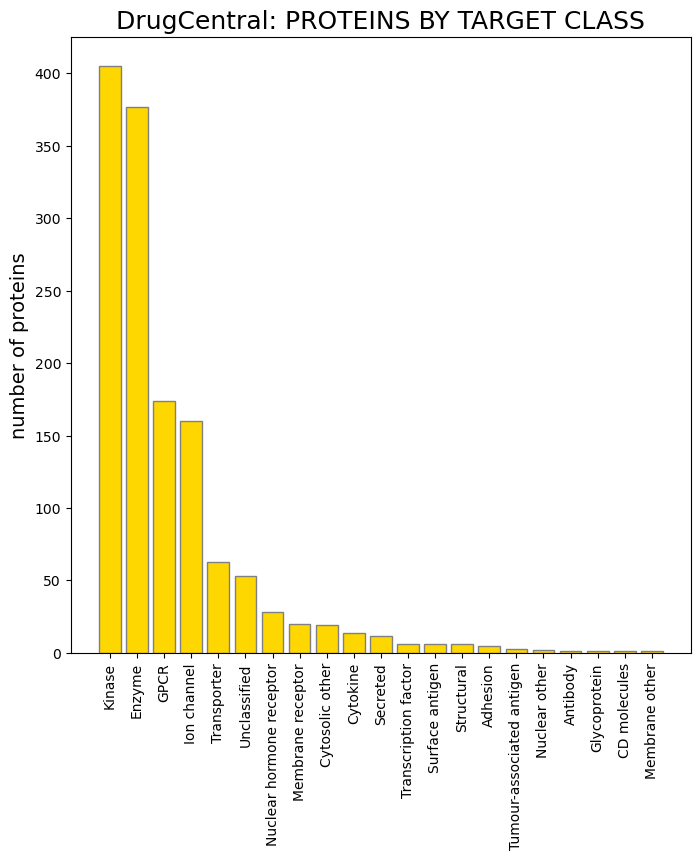

In [21]:
plt.figure(figsize=(8,8))
plt.bar(dfclass.index, dfclass["TARGET_NAME"], color="gold", edgecolor="grey")
plt.xticks(rotation=90)
plt.title("DrugCentral: PROTEINS BY TARGET CLASS", fontsize=18)
plt.ylabel("number of proteins", fontsize=14)
plt.show()

## 3. Manipulació de les dades

**a) És conegut que els fàrmacs generalment interaccionen amb més d’una proteïna, una de les raons per la qual tots els fàrmacs poden tenir efectes secundaris. Amb quantes proteïnes de mitjana interaccionen els fàrmacs? És el mateix valor per a totes les classes de proteïna ?**  _Nota: Per obtenir el valor mitjà per una determinada cada classe considereu únicament les interaccions que involucren a aquella classe._ [1.5 punt]

In [22]:
#Opció 1
df_ha.groupby("DRUG_NAME")[['TARGET_NAME']].nunique().mean()

TARGET_NAME    6.44652
dtype: float64

In [23]:
#Opció 2
interactionMEAN = df_ha.groupby("DRUG_NAME").apply(lambda x: len(x["TARGET_NAME"].unique())).mean()
print("Cada fàrmac interacciona amb una mitjana de {} proteïnes.".format(round(interactionMEAN,2)))

Cada fàrmac interacciona amb una mitjana de 6.45 proteïnes.


In [24]:
#Per a veure si la mitjana és la mateixa a totes les classes, obtenim una llista amb els fàrmacs assignats a cada classe
df_class = df_ha.groupby("TARGET_CLASS")
df_class_drug = df_class.apply(lambda x: x["DRUG_NAME"].values)
print(df_class_drug)

TARGET_CLASS
Adhesion                     [eptifibatide, lovastatin, tirofiban, efalizum...
Antibody                                                          [omalizumab]
CD molecules                                                    [atezolizumab]
Cytokine                     [beclometasone dipropionate, budesonide, budes...
Cytosolic other              [paracetamol, aprindine, astemizole, bezafibra...
Enzyme                       [levobupivacaine, aminopterin, phenylbutanoic ...
GPCR                         [abarelix, acebutolol, acebutolol, acefylline,...
Glycoprotein                                                     [romosozumab]
Ion channel                  [levobupivacaine, levobupivacaine, levobupivac...
Kinase                       [aceclofenac, adenine, adenosine, adenosine, a...
Membrane other                                                     [ezetimibe]
Membrane receptor            [alexidine, amantadine, amiodarone, amitriptyl...
Nuclear hormone receptor     [adapalene

In [25]:
#Calculem la mitjana de targets en cada classe (en cada grup)
for t_class, drug in df_class:
    mean = drug.groupby("DRUG_NAME").apply(lambda x: len(x["TARGET_NAME"].unique())).mean()
    print(t_class, mean)

Adhesion 1.0
Antibody 1.0
CD molecules 1.0
Cytokine 1.2608695652173914
Cytosolic other 1.2105263157894737
Enzyme 2.7150192554557124
GPCR 5.319790301441677
Glycoprotein 1.0
Ion channel 2.2375979112271542
Kinase 14.435233160621761
Membrane other 1.0
Membrane receptor 1.0416666666666667
Nuclear hormone receptor 2.018292682926829
Nuclear other 1.0
Secreted 1.3389830508474576
Structural 1.25
Surface antigen 1.1538461538461537
Transcription factor 1.1818181818181819
Transporter 2.112565445026178
Tumour-associated antigen 1.0
Unclassified 1.2372881355932204


In [26]:
# Alternativament, una mica rebuscat
df_ha.groupby(["TARGET_CLASS"]).apply(lambda df: df.groupby("DRUG_NAME")['TARGET_NAME'].nunique().mean()).sort_values(ascending=False)

TARGET_CLASS
Kinase                       14.435233
GPCR                          5.319790
Enzyme                        2.715019
Ion channel                   2.237598
Transporter                   2.112565
Nuclear hormone receptor      2.018293
Secreted                      1.338983
Cytokine                      1.260870
Structural                    1.250000
Unclassified                  1.237288
Cytosolic other               1.210526
Transcription factor          1.181818
Surface antigen               1.153846
Membrane receptor             1.041667
Tumour-associated antigen     1.000000
Adhesion                      1.000000
Nuclear other                 1.000000
Antibody                      1.000000
Glycoprotein                  1.000000
CD molecules                  1.000000
Membrane other                1.000000
dtype: float64

**b) Quin és el perfil dels valors d’afinitat que hi ha en les interaccions (column = `ACT_VALUE`)? Hi ha alguna diferència entre les interaccions involucrades en el mecanisme d’acció dels fàrmacs i la resta (output de la pregunta 2.C)? Il·lustreu-ho amb un gràfic, per exemple, un histograma on es mostri el perfil dels valors d'afinitat generals i els valors implicats en el MOA.** [1 punt]

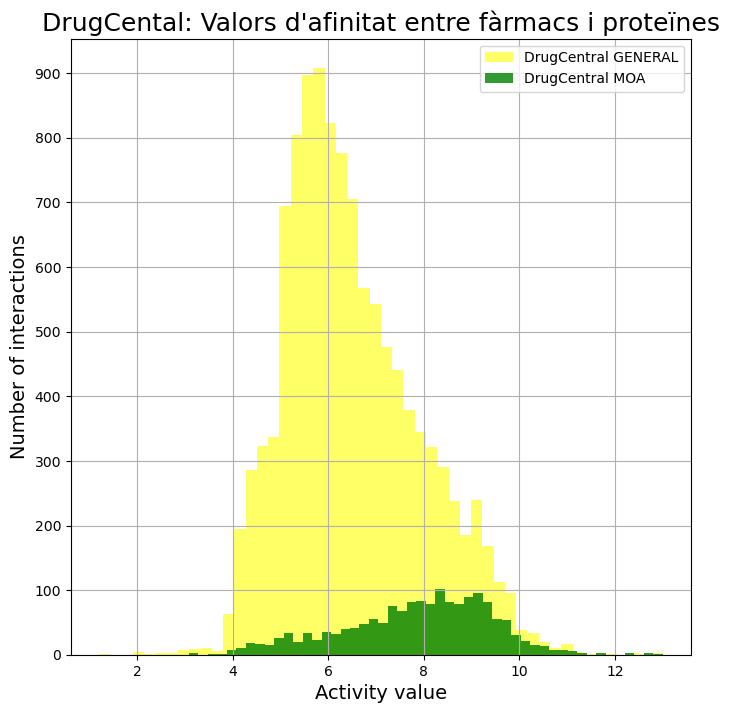

In [27]:
plt.figure(figsize=(8,8))

plt.hist(df_ha["ACT_VALUE"], bins=50, alpha=0.6, color='yellow', label="DrugCentral GENERAL") #Valors d'activitat general
plt.hist(dfmoa["ACT_VALUE"], bins=50, alpha=0.8, color="green", label="DrugCentral MOA") #Valors d'activitat de les interaccions implicades en el MOA

plt.title("DrugCental: Valors d'afinitat entre fàrmacs i proteïnes", fontsize = 18)
plt.xlabel("Activity value", fontsize = 14)
plt.ylabel("Number of interactions", fontsize = 14)
plt.yticks(np.arange(0,950,100))

plt.grid(True)
plt.legend()
plt.show()

## 4. Anàlisi d'una proteïna

**S’ha observat que els fàrmacs que actuen sobre una proteïna anomenada hERG (gen KCNH2) poden produir efectes adversos seriosos. Aquesta proteïna és un canal de ions de potassi i alterar la seva funció pot produir el que es coneix com _torsade des pointes_, una alteració de l’electrocardiograma que pot degenerar en fibril·lació ventricular i mort sobtada.**

**a) Quants fàrmacs hi ha amb activitat per aquesta proteïna? (columna = `GENE`)** [0.5 punts]

In [28]:
#seleccionem les files que corresponen al gen d'interès
herg = df_ha[df_ha["GENE"] == "KCNH2"]
print("Hi ha {} fàrmacs que interaccionen amb la proteïna hERG.".format(herg.nunique()["DRUG_NAME"]))

Hi ha 152 fàrmacs que interaccionen amb la proteïna hERG.


**b) Com a regla general sabem que una activitat pot començar a ser rellevant si és superior a 5 (equivalent a 10 μM) (Recordem que com més alt és el logaritme del valor d'activitat, més forta és la interacció). Genereu un fitxer amb les interaccions sospitoses (activitat >=5) de produir _torsade des pointes_ ordenat per la seva afinitat pel canal hERG de més gran a més petit.** [1 punt]

In [29]:
#Seleccionem aquelles files on la interacció entre hERG i el fàrmac és més gran de 5s
herg_potent = herg[herg["ACT_VALUE"] >= 5].sort_values("ACT_VALUE", ascending=False)
print ("Hi ha {} fàrmacs amb una afinitat >= 5 per a hERG".format(herg_potent.nunique()["DRUG_NAME"]))
herg_potent.head()

Hi ha 115 fàrmacs amb una afinitat >= 5 per a hERG


,DRUG_NAME,STRUCT_ID,TARGET_NAME,TARGET_CLASS,ACCESSION,GENE,SWISSPROT,ACT_VALUE,ACT_UNIT,ACT_TYPE,ACT_COMMENT,ACT_SOURCE,RELATION,MOA,MOA_SOURCE,ACT_SOURCE_URL,MOA_SOURCE_URL,ACTION_TYPE,TDL,ORGANISM
829,astemizole,249,Potassium voltage-gated channel subfamily H me...,Ion channel,Q12809,KCNH2,KCNH2_HUMAN,9.0458,NaN,IC50,NaN,WOMBAT-PK,=,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
10391,sertindole,2435,Potassium voltage-gated channel subfamily H me...,Ion channel,Q12809,KCNH2,KCNH2_HUMAN,8.5700,NaN,IC50,Inhibition of human cloned ERG expressed in CH...,CHEMBL,=,NaN,NaN,https://www.ebi.ac.uk/chembl/compound/inspect/...,NaN,NaN,Tclin,Homo sapiens
993,benperidol,312,Potassium voltage-gated channel subfamily H me...,Ion channel,Q12809,KCNH2,KCNH2_HUMAN,8.4700,NaN,IC50,NaN,WOMBAT-PK,=,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
3818,dofetilide,942,Potassium voltage-gated channel subfamily H me...,Ion channel,Q12809,KCNH2,KCNH2_HUMAN,8.1900,NaN,Ki,Displacement of [3H]dofetilide from hERG expre...,CHEMBL,=,1.0,CHEMBL,https://www.ebi.ac.uk/chembl/compound/inspect/...,https://www.ebi.ac.uk/chembl/compound/inspect/...,BLOCKER,Tclin,Homo sapiens
2179,cisapride,660,Potassium voltage-gated channel subfamily H me...,Ion channel,Q12809,KCNH2,KCNH2_HUMAN,8.1900,NaN,IC50,Inhibition of human ERG in MCF7 cells,CHEMBL,=,NaN,NaN,https://www.ebi.ac.uk/chembl/compound/inspect/...,NaN,NaN,Tclin,Homo sapiens


In [30]:
#Generar un fitxer amb les interaccions sospitoses de la taula anterior
herg_potent.to_csv("herg.csv", sep=",")

**c) Comproveu si és veritat per als tres primers fàrmacs obtinguts cercant bibliografia.** [0.5 punts]

**Astemizole**: Antagonista del receptor de la histamina. S'utilitza en el tractament de l'al·lèrgia. S'ha descrit àmpliament *torsade des pointes* com possible afecte adverse.
* https://pubchem.ncbi.nlm.nih.gov/compound/astemizole#section=Mechanism-of-Action
* https://www.mayoclinicproceedings.org/article/S0025-6196(12)62252-6/fulltext
* https://pubmed.ncbi.nlm.nih.gov/8189766/

**Sertindole**: Antagonista del receptor de la dopamina, serotonina i adrenèrgic A1. S'utilitza per al tractament de l'esquizofrènia.
S'ha documentat que causa *torsade des pointes* i va ser retirat del mercat al cap de dos anys d'aprovar-se.
 * https://pubmed.ncbi.nlm.nih.gov/11691681/
 * https://en.wikipedia.org/wiki/Sertindole

**Benperidol**: Antagonista del receptor de la dopamina, serotonina i adrenèrgic A1. S'utilitza per al tractament de l'esquizofrènia i l'ansietat. Tot i que hi ha indicis que pot produïr *torsade des pointes* com a efecte advers sembla que es menys habitual que en altres fàrmacs de la mateixa família.
* https://www.medscape.co.uk/drug/benperidol-68523-68523 
* https://pubmed.ncbi.nlm.nih.gov/28791627/
